In [1]:
from glob import glob
import pickle

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
file_list = glob('data8/*')

In [13]:
all_data_dicts = {
    'S':[],
    'M':[],
    'L':[],
    'X':[]
}

for filename in file_list:
    with open(filename, 'rb') as handle:
        this_dict = pickle.load(handle)
        this_dict['t']=int(filename[-8])
        all_data_dicts[filename[12]].append(this_dict)




In [14]:
all_data_dicts

{'S': [{'sig_ratio': 0.075, 'dimension': 12, 'result': [[12, 0]], 't': 7},
  {'sig_ratio': 0.09, 'dimension': 8, 'result': [[8, 4]], 't': 7},
  {'sig_ratio': 0.02, 'dimension': 6, 'result': [[6, -1]], 't': 4},
  {'sig_ratio': 0.1, 'dimension': 2, 'result': [[2, 2]], 't': 2},
  {'sig_ratio': 0.08, 'dimension': 8, 'result': [[8, 2]], 't': 9},
  {'sig_ratio': 0.02, 'dimension': 2, 'result': [[2, -1]], 't': 8},
  {'sig_ratio': 0.1, 'dimension': 16, 'result': [[16, 2]], 't': 4},
  {'sig_ratio': 0.02, 'dimension': 1, 'result': [[1, 0]], 't': 7},
  {'sig_ratio': 0.09, 'dimension': 20, 'result': [[20, 0]], 't': 9},
  {'sig_ratio': 0.1, 'dimension': 16, 'result': [[16, 2]], 't': 7},
  {'sig_ratio': 0.09, 'dimension': 6, 'result': [[6, -1]], 't': 0},
  {'sig_ratio': 0.03, 'dimension': 1, 'result': [[1, 0]], 't': 0},
  {'sig_ratio': 0.07, 'dimension': 2, 'result': [[2, 0]], 't': 1},
  {'sig_ratio': 0.1, 'dimension': 30, 'result': [[30, 0]], 't': 9},
  {'sig_ratio': 0.075, 'dimension': 4, 'result'

In [15]:
def make_dict(key):
    numbers_S = {}

    for event in all_data_dicts[key]:
        sig_ratio, dim, t = event['sig_ratio'], event['dimension'], event['t']
        if sig_ratio not in numbers_S:
            numbers_S[sig_ratio] = [0 for _ in range(10)]
        numbers_S[sig_ratio][t] = max(dim, numbers_S[sig_ratio][t])
        
    out = {key:sum(val)/10 for key, val in numbers_S.items()}
    return out



In [16]:
numbers_S = make_dict('S')

In [17]:
numbers_M = make_dict('M')
numbers_L = make_dict('L')
numbers_XS = make_dict('X')

In [18]:
def sort_dict(d):
    return dict(sorted(d.items()))

In [19]:
numbers_S = sort_dict(numbers_S)
numbers_M = sort_dict(numbers_M)
numbers_L = sort_dict(numbers_L)
numbers_XS = sort_dict(numbers_XS)

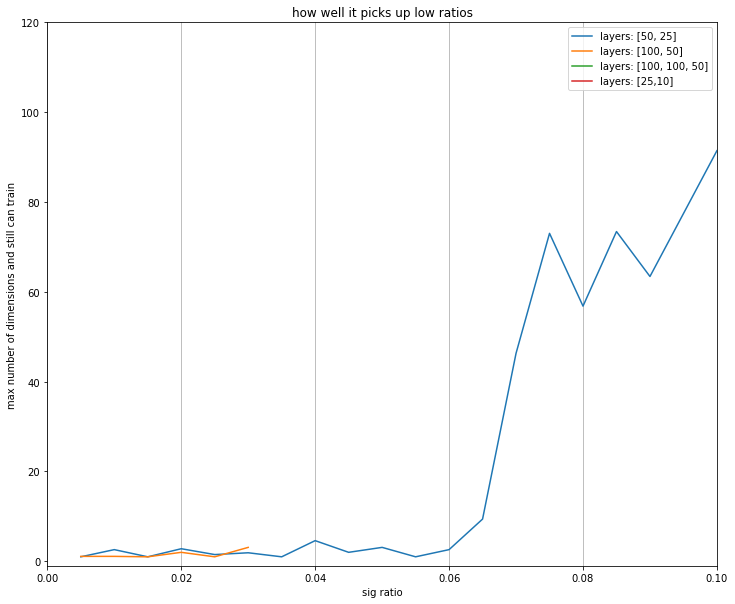

In [20]:
    
fig, ax = plt.subplots(figsize = (12,10))

ax.plot(numbers_S.keys(), numbers_S.values(),label = 'layers: [50, 25]')
ax.plot(numbers_M.keys(), numbers_M.values(),label = 'layers: [100, 50]')
ax.plot(numbers_L.keys(), numbers_L.values(),label = 'layers: [100, 100, 50]')

ax.plot(numbers_XS.keys(), numbers_XS.values(),label = 'layers: [25,10]')


ax.legend()

ax.set_title('how well it picks up low ratios')
ax.set_xlabel('sig ratio')

ax.set_ylabel('max number of dimensions and still can train')
ax.set_xlim((0,0.1))
ax.set_ylim((-1, 120))
ax.grid(axis="x", which = 'both')

plt.show()

In [21]:
def make_dict(key):
    numbers_S = {}

    for event in all_data_dicts[key]:
        sig_ratio, dim, t = event['sig_ratio'], event['dimension'], event['t']
        if sig_ratio not in numbers_S:
            numbers_S[sig_ratio] = [0 for _ in range(10)]
        numbers_S[sig_ratio][t] = max(dim, numbers_S[sig_ratio][t])
        
    # out = {key:sum(val)/10 for key, val in numbers_S.items()}
    return numbers_S


In [22]:
numbers_S = make_dict('S')

In [23]:
numbers_S = sort_dict(numbers_S)


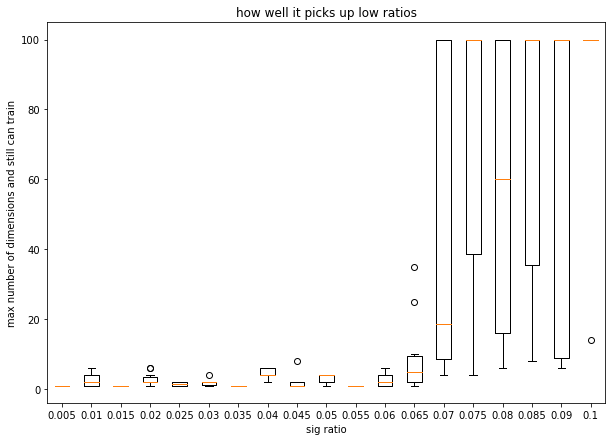

In [26]:
labels = []
data = []
for x, y in numbers_S.items():
    data.append(y)
    labels.append(x)
 
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(data)
 
      
# x-axis labels
ax.set_xticklabels(labels)
 
# Adding title
ax.set_title('how well it picks up low ratios')
ax.set_xlabel('sig ratio')

ax.set_ylabel('max number of dimensions and still can train')
 
     
# show plot
plt.show()